# Twitter API to search for trends

* https://github.com/tweepy/tweepy
* https://developer.twitter.com/
* https://towardsdatascience.com/twitter-trends-analysis-using-python-fc78146f2f72
* https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/


## Twitter project App: **python-twitter-trend-search** | APP ID: **21050690**

### Consumer Keys

API Key = **ZxHl2xk1eKCYCujsA92BJ8eC3**

API Secret Key = **rsfZaM1ExTETDqitWslgBsRPrhZMZT6h8497sdJjs2uetyvBuQ**

### Authentication Tokens

Bearer Token = **AAAAAAAAAAAAAAAAAAAAAEI1QQEAAAAABCbVzzlAjvSdC2uy2NaYH7zmQ7w%3DFMquq1XSdFsAEu2QAK0iENWLKn3F6g99KdlPorQCDMKC1rYp8t**

Access Token = **2405388712-zVBz95Kyy8RnNOckI7RzaIlxhAtHofaZIeLnWI8**

Access Token Secret = **xPIYSFUkFbPJWayuV9jPcEI6ElQHUO44Y4gXHiYGge1Ft**

In [6]:
# Install the twitter python wrapper TWEEPY
#!python3.8 -m pip install tweepy

  Using cached tweepy-3.10.0-py2.py3-none-any.whl (30 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 kB)
You should consider upgrading via the '/opt/anaconda3/bin/python3.8 -m pip install --upgrade pip' command.


In [314]:
'''
imports
'''
# General imports
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Stream
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uuid

# Logistic Regression (Churn classification)
from scipy.signal import find_peaks
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

## Environment Variables and Authentication

In [335]:
'''
GLOBAL ENVIRONMENT TWITTER VARIABLES
'''
consumer_API_key = 'ZxHl2xk1eKCYCujsA92BJ8eC3'
consumer_API_secret = 'rsfZaM1ExTETDqitWslgBsRPrhZMZT6h8497sdJjs2uetyvBuQ'
auth_access_token = '2405388712-zVBz95Kyy8RnNOckI7RzaIlxhAtHofaZIeLnWI8'
auth_access_token_secret = 'xPIYSFUkFbPJWayuV9jPcEI6ElQHUO44Y4gXHiYGge1Ft'
#kw_list = ['energia solar', 'ahorro energia', 'placas solares', 'energia fotovoltaica', 'energia solar fotovoltaica', 'placa energia solar']
kw_list = ['energia solar','placas solares']
search_words = "#" + kw_list[0] # search one by one
date_since = "2021-06-21"
date_until = '2021-06-22'
directory = "/Users/joan/Workspace/python/py-trends-api/"
geo_location='ES' # specific country location Spain


# Consumer key authentication(consumer_key,consumer_secret can be collected from our twitter developer profile)
auth = OAuthHandler(consumer_API_key, consumer_API_secret)

# Access key authentication(access_token,access_token_secret can be collected from our twitter developer profile)
auth.set_access_token(auth_access_token, auth_access_token_secret)

# Set up the API with the authentication handler
api = API(auth)

## Searching for tweets

In [336]:
# Collect tweets as of the Auth Session Creation Date: (Not before)
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="es",
              since=date_since,
              until = date_until
              ).items(100000)

# Collect a list of tweets
#[tweet.text for tweet in tweets]

# Search for including location
#location_and_date_tweets = [[tweet.user.location, tweet.created_at] for tweet in tweets]
#location_and_date_tweets
tweets_by_date = [[tweet.created_at] for tweet in tweets]
len(tweets_by_date)

22

In [337]:
# TODO --> create function to iterate kw list and search trends one by one and month by month just like google


## Processing Data

In [338]:
# Create Pandas Dataframe
#df = pd.DataFrame(data=location_and_date_tweets, columns=['location', "date"])
df = pd.DataFrame(data=tweets_by_date, columns=["date"])

# Update date column without hour, minute and second
df['date'] = pd.to_datetime(df["date"].dt.strftime('%Y-%m-%dT%H')) # date is datetime type with time (only hour)
#df['date'] = df['date'].apply(lambda x: pd.to_datetime(x).date() # date is object type without time

# group by sum of tweets by day as "twitter_interest"
#df['twitterInterest'] = df.groupby(["date"]).sum()
df = (df.groupby(["date"]).size()).reset_index(name='twitter_interest')

# Add time columns
df['year'], df['month'], df['day'], df['hour'] = df['date'].apply(lambda x: x.year), df['date'].apply(lambda x: x.month), df['date'].apply(lambda x: x.day), df['date'].apply(lambda x: x.hour)

df

,date,twitter_interest,year,month,day,hour
0,2021-06-21 07:00:00,3,2021,6,21,7
1,2021-06-21 08:00:00,2,2021,6,21,8
2,2021-06-21 09:00:00,4,2021,6,21,9
3,2021-06-21 10:00:00,1,2021,6,21,10
4,2021-06-21 12:00:00,1,2021,6,21,12
5,2021-06-21 14:00:00,2,2021,6,21,14
6,2021-06-21 15:00:00,1,2021,6,21,15
7,2021-06-21 16:00:00,2,2021,6,21,16
8,2021-06-21 17:00:00,2,2021,6,21,17
9,2021-06-21 19:00:00,1,2021,6,21,19


In [339]:
df

,date,twitter_interest,year,month,day,hour
0,2021-06-21 07:00:00,3,2021,6,21,7
1,2021-06-21 08:00:00,2,2021,6,21,8
2,2021-06-21 09:00:00,4,2021,6,21,9
3,2021-06-21 10:00:00,1,2021,6,21,10
4,2021-06-21 12:00:00,1,2021,6,21,12
5,2021-06-21 14:00:00,2,2021,6,21,14
6,2021-06-21 15:00:00,1,2021,6,21,15
7,2021-06-21 16:00:00,2,2021,6,21,16
8,2021-06-21 17:00:00,2,2021,6,21,17
9,2021-06-21 19:00:00,1,2021,6,21,19


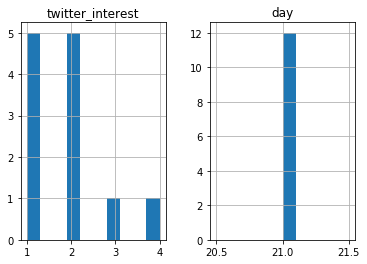

Text(0, 0.5, 'twitter_interest')

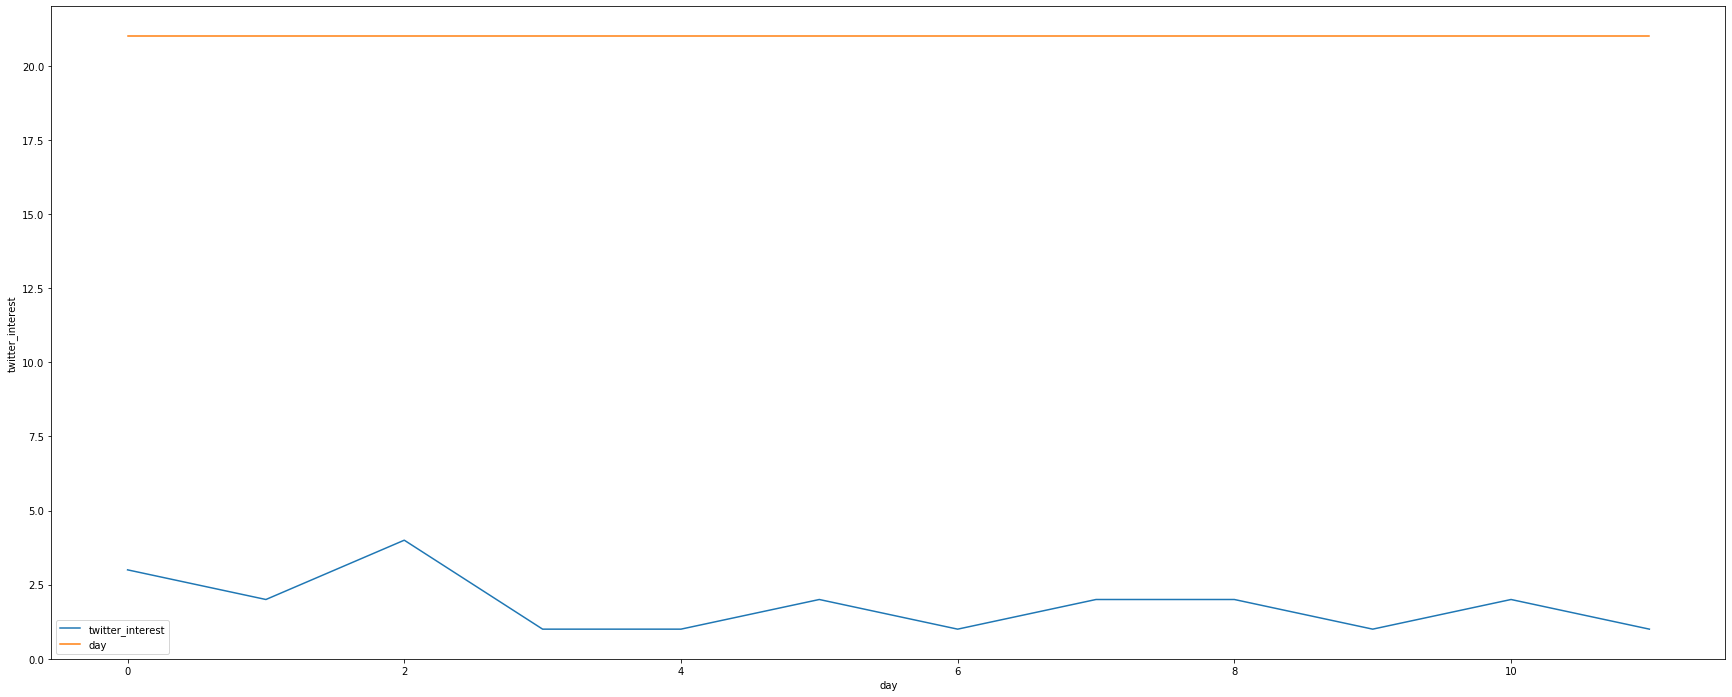

In [340]:
# Visualize data, are there peaks to be detected?
trend_df = df[['twitter_interest','day']]
trend_df.hist()
plt.show()

trend_df.plot(figsize=(30, 12))
plt.xlabel('day')
plt.ylabel('twitter_interest')

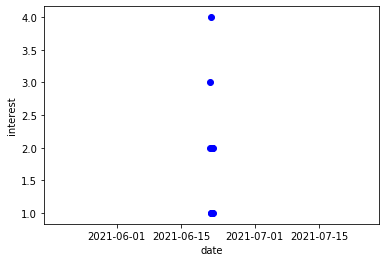

In [341]:
# relationship vars 

plt.scatter(df.date, df.twitter_interest,  color='blue')
plt.xlabel("date")
plt.ylabel("interest")
plt.show()

In [342]:
# Save Dataset into CSV file
id = uuid.uuid1()    # get unique identifier for the whole transaccions
filename_base = "twitter_historical-"+id.hex
df.to_csv(directory + filename_base) # base name for all the temporal files'+geo_location+'.csv', index = False)
print("Saved file to: " + directory + filename_base + ".csv")

Saved file to: /Users/joan/Workspace/python/py-trends-api/twitter_historical-0709a120d32c11eb9cc61e0039143432.csv


## Peaks Detection

Peaks are: [ 2  5  7 10]


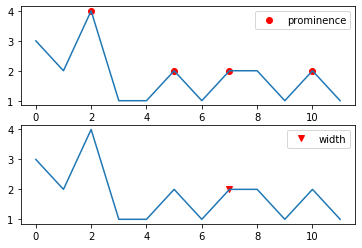

In [346]:
# Peaks detection

x = np.array(df['twitter_interest'])
#peaks, _ = find_peaks(x, distance=20)
peaks2, _ = find_peaks(x, prominence=1)      
peaks3, _ = find_peaks(x, width=2)
#peaks4, _ = find_peaks(x, threshold=2)  

# print the peaks
print('Peaks are: %s' % (peaks2))

# visualize and compare peaks detectors
#plt.subplot(2, 1, 1)
#plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance']) # ko
plt.subplot(2, 1, 1)
plt.plot(peaks2, x[peaks2], "or"); plt.plot(x); plt.legend(['prominence']) # BEST !
plt.subplot(2, 1, 2)
plt.plot(peaks3, x[peaks3], "vr"); plt.plot(x); plt.legend(['width'])  # BEST !
#plt.subplot(2, 1, 2)
#plt.plot(peaks4, x[peaks4], "or"); plt.plot(x); plt.legend(['threshold']) # ko

plt.show()

In [347]:
# Mark registry as a peak 1 = true or not 0 = false
df['is_peak'] = 0
for i in peaks2:
    df.loc[i,['is_peak']] = 1

filter = df['is_peak'] == 1 # check updates
df[filter]

,date,twitter_interest,year,month,day,hour,is_peak
2,2021-06-21 09:00:00,4,2021,6,21,9,1
5,2021-06-21 14:00:00,2,2021,6,21,14,1
7,2021-06-21 16:00:00,2,2021,6,21,16,1
10,2021-06-21 20:00:00,2,2021,6,21,20,1


## Logistic Regression for is_peak prediction

In [348]:
# Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement by the skitlearn algorithm:
# churn_df = df[['placas solares','max_interest', 'avg_interest','is_peak']]
# churn is is_peak column
df['is_peak'] = df['is_peak'].astype('int')
df.head()

,date,twitter_interest,year,month,day,hour,is_peak
0,2021-06-21 07:00:00,3,2021,6,21,7,0
1,2021-06-21 08:00:00,2,2021,6,21,8,0
2,2021-06-21 09:00:00,4,2021,6,21,9,1
3,2021-06-21 10:00:00,1,2021,6,21,10,0
4,2021-06-21 12:00:00,1,2021,6,21,12,0


In [349]:
# Save Dataset into CSV file
df.to_csv(directory + filename_base + "_PEAKS.csv", index = False)
print("Saved file to: " + directory + filename_base + "_PEAKS.csv")

Saved file to: /Users/joan/Workspace/python/py-trends-api/twitter_historical-0709a120d32c11eb9cc61e0039143432_PEAKS.csv


In [350]:
# Lets define X, and y for our dataset:
#X = np.asarray(df[['ahorro energia','energia solar', 'placas solares','avg_interest','max_interest','year','month','day','hour']])
X = np.asarray(df[['year','month','day','hour','twitter_interest']])
#X = np.asarray(df[['energia solar','placas solares','energia fotovoltaica','energia solar fotovoltaica','max_interest','avg_interest']])
X[0:5]
y = np.asarray(df['is_peak'])
y [0:5]

# Also, we normalize the dataset:
# from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.  ,  0.  ,  0.  , -1.5 ,  1.3 ],
       [ 0.  ,  0.  ,  0.  , -1.29,  0.19],
       [ 0.  ,  0.  ,  0.  , -1.07,  2.41],
       [ 0.  ,  0.  ,  0.  , -0.86, -0.93],
       [ 0.  ,  0.  ,  0.  , -0.44, -0.93]])

In [351]:
# Train and test Dataset
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6, 5) (6,)
Test set: (6, 5) (6,)


In [352]:
# Train the model
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LRyhat = LR.predict(X_test)

# Now we can predict using our test set:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 1, 1, 0])

In [353]:
#predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [354]:
# Evaluation
# Jaccard
# from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)



0.3333333333333333

In [355]:
# Evaluation
# Confusion Matrix
#from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[0 1]
 [3 2]]


Confusion matrix, without normalization
[[0 1]
 [3 2]]


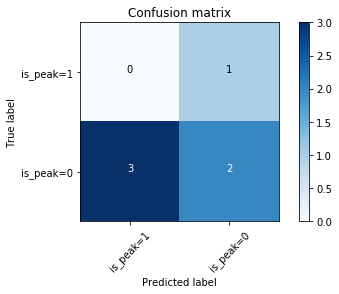

In [356]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['is_peak=1','is_peak=0'],normalize= False,  title='Confusion matrix')

In [357]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.33      0.20      0.25         6
weighted avg       0.56      0.33      0.42         6



In [358]:
# Log loss
# from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6949129048561254